In [16]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt
import pandas as pd

In [17]:

# Dados de entrada (Sol: 1=sim, 0=não; Temperatura)
X = [
    [1, 30],  # Sol, quente
    [1, 25],  # Sol, médio
    [0, 22],  # Sem sol
    [0, 28],  # Sem sol, quente
    [1, 20],  # Sol, frio
]

# Saída: 1 = vai à praia, 0 = não vai
y = [1, 1, 0, 0, 0]

In [18]:
modelo = DecisionTreeClassifier().fit(X, y)

In [19]:
nova_entrada = [[1, 27]]  # Sol, temperatura média
previsao = modelo.predict(nova_entrada)  # 1 = vai à praia, 0 = não vai

print(f"Previsão: {'Vai à praia' if previsao[0] == 1 else 'Não vai à praia'}")

Previsão: Vai à praia


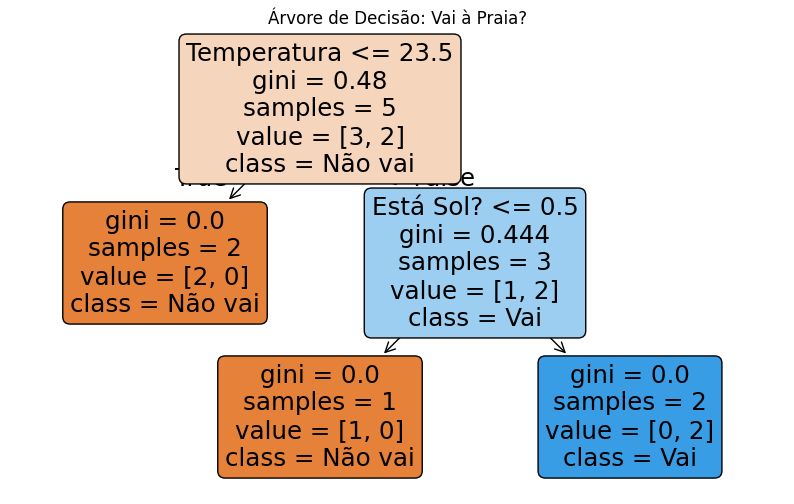

In [20]:
# Desenhar a árvore
plt.figure(figsize=(10, 6))
plot_tree(modelo,
          feature_names=["Está Sol?", "Temperatura"],
          class_names=["Não vai", "Vai"],
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão: Vai à Praia?")
plt.show()

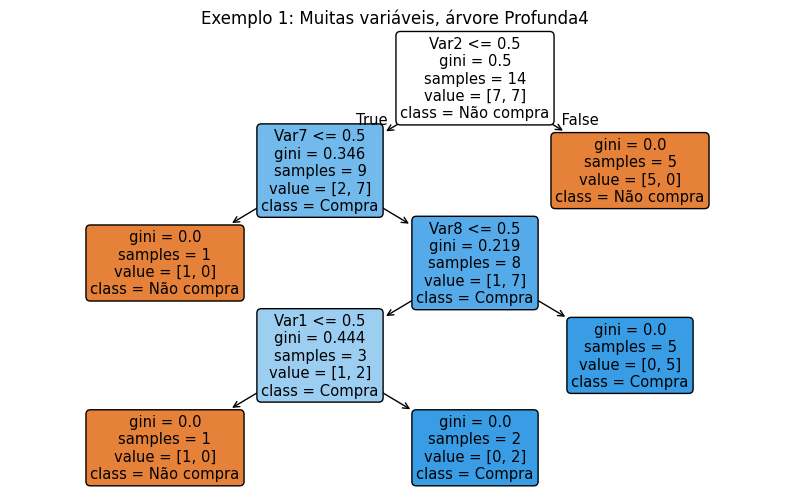

Acurácia do modelo raso: 0.50


In [45]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Gerando dados aleatórios para o exemplo 1 (muitas variáveis, árvore rasa)
X1 = np.random.randint(0, 2, (20, 8))  # 20 registros, 8 variáveis binárias
y1 = np.random.randint(0, 2, 20)      # Classes binárias

# Separando em treino e teste
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
# Criando e treinando o modelo (árvore rasa)
modelo_profundo = DecisionTreeClassifier(random_state=42)
modelo_profundo.fit(X1_train, y1_train)

# Plotando a árvore

plt.figure(figsize=(10, 6))
plot_tree(modelo_profundo, feature_names=[f'Var{i+1}' for i in range(8)], class_names=['Não compra', 'Compra'], filled=True, rounded=True)
plt.title(f"Exemplo 1: Muitas variáveis, árvore Profunda{modelo_profundo.get_depth()} ")
plt.show()

# Fazendo previsões e calculando acurácia
previsoes1 = modelo_profundo.predict(X1_test)
acuracia1 = accuracy_score(y1_test, previsoes1)
print(f"Acurácia do modelo raso: {acuracia1:.2f}")

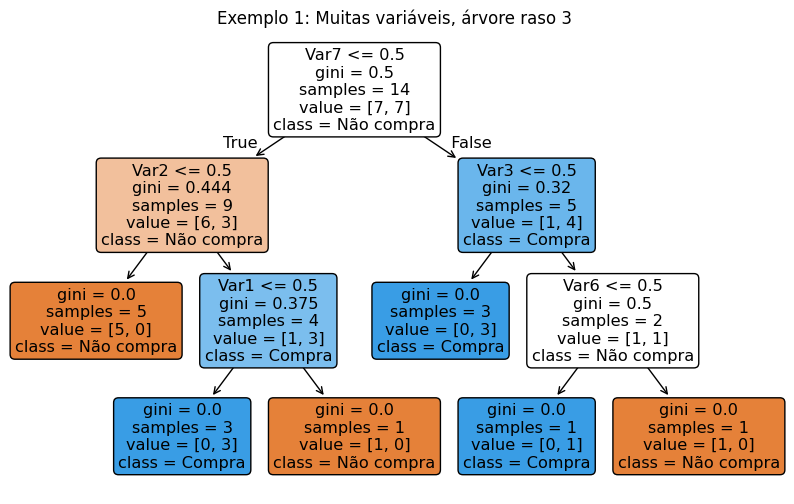

Acurácia do modelo raso: 0.67


In [47]:
# Criando o modelo raso

# Gerando dados aleatórios para o exemplo 1 (muitas variáveis, árvore rasa)
X2 = np.random.randint(0, 2, (20, 8))  # 20 registros, 8 variáveis binárias
y2 = np.random.randint(0, 2, 20)      # Classes binárias

# Separando em treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
# Criando e treinando o modelo (árvore rasa)
modelo_raso = DecisionTreeClassifier(max_depth=6, random_state=42)
modelo_raso.fit(X2_train, y2_train)

# Plotando a árvore

plt.figure(figsize=(10, 6))
plot_tree(modelo_raso, feature_names=[f'Var{i+1}' for i in range(8)], class_names=['Não compra', 'Compra'], filled=True, rounded=True)
plt.title(f"Exemplo 1: Muitas variáveis, árvore raso {modelo_raso.get_depth()} ")
plt.show()

# Fazendo previsões e calculando acurácia
previsoes2 = modelo_raso.predict(X2_test)
acuracia2 = accuracy_score(y2_test, previsoes2)
print(f"Acurácia do modelo raso: {acuracia2:.2f}")

# Relatorio oara aavaliação da qualidade do modelo

In [ ]:
'''
Você tem dados de clientes onde:

Classe 0: Cliente não comprou (90% dos casos)

Classe 1: Cliente comprou (10% dos casos)

Vamos treinar uma árvore de decisão para prever quem comprará e corrigir o
desbalanceamento.
'''

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split


In [49]:
# 1. Gerando dados desbalanceados
np.random.seed(42)
X = np.random.randn(1000, 2)
y = np.zeros(1000)
y[:100] = 1  # Apenas 10% dos casos são classe 1

Distribuição das classes: {np.float64(0.0): np.int64(900), np.float64(1.0): np.int64(100)}

Modelo SEM balanceamento:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       265
         1.0       0.21      0.17      0.19        35

    accuracy                           0.83       300
   macro avg       0.55      0.54      0.55       300
weighted avg       0.81      0.83      0.82       300

Acurácia: 0.8266666666666667
AUC: 0.5423180592991914

Modelo COM class_weight='balanced':
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       265
         1.0       0.10      0.09      0.09        35

    accuracy                           0.81       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.79      0.81      0.80       300

Acurácia: 0.8066666666666666
AUC: 0.4938005390835579


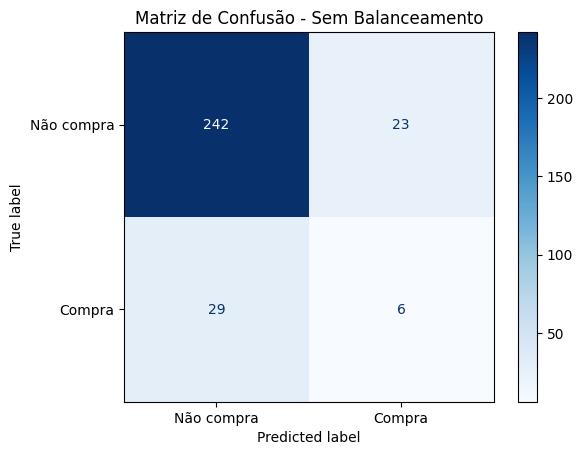

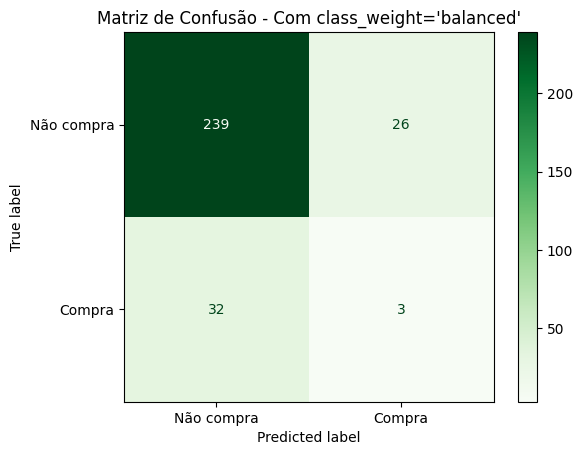

In [50]:
# Verificando balanceamento inicial
unique, counts = np.unique(y, return_counts=True)
print(f"Distribuição das classes: {dict(zip(unique, counts))}")

# 2. Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ========================
# MODELO SEM BALANCEAMENTO
# ========================
modelo_sem_bal = DecisionTreeClassifier(random_state=42)
modelo_sem_bal.fit(X_train, y_train)

y_pred_sem = modelo_sem_bal.predict(X_test)
print("\nModelo SEM balanceamento:")
print(classification_report(y_test, y_pred_sem))
print("Acurácia:", accuracy_score(y_test, y_pred_sem))
print("AUC:", roc_auc_score(y_test, modelo_sem_bal.predict_proba(X_test)[:, 1]))

# ========================
# MODELO COM class_weight='balanced'
# ========================
modelo_peso = DecisionTreeClassifier(class_weight='balanced', random_state=42)
modelo_peso.fit(X_train, y_train)

y_pred_peso = modelo_peso.predict(X_test)
print("\nModelo COM class_weight='balanced':")
print(classification_report(y_test, y_pred_peso))
print("Acurácia:", accuracy_score(y_test, y_pred_peso))
print("AUC:", roc_auc_score(y_test, modelo_peso.predict_proba(X_test)[:, 1]))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz para o modelo SEM balanceamento
cm_sem = confusion_matrix(y_test, y_pred_sem)
disp_sem = ConfusionMatrixDisplay(confusion_matrix=cm_sem, display_labels=['Não compra', 'Compra'])
disp_sem.plot(cmap='Blues')
plt.title("Matriz de Confusão - Sem Balanceamento")
plt.show()

# Matriz para o modelo COM class_weight
cm_peso = confusion_matrix(y_test, y_pred_peso)
disp_peso = ConfusionMatrixDisplay(confusion_matrix=cm_peso, display_labels=['Não compra', 'Compra'])
disp_peso.plot(cmap='Greens')
plt.title("Matriz de Confusão - Com class_weight='balanced'")
plt.show()

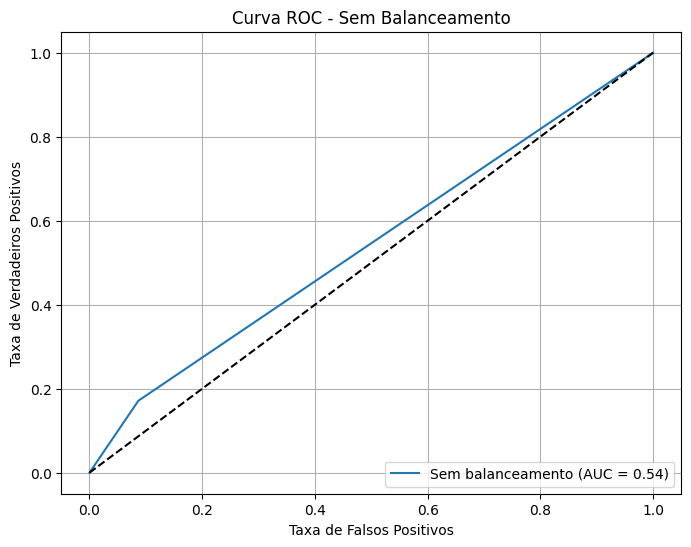

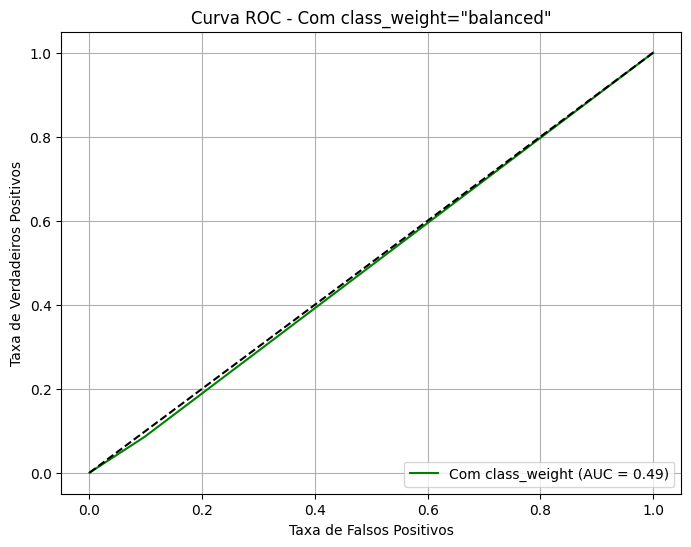

In [51]:

# MODELO SEM BALANCEAMENTO
prob_sem = modelo_sem_bal.predict_proba(X_test)[:, 1]
fpr_sem, tpr_sem, _ = roc_curve(y_test, prob_sem)
auc_sem = roc_auc_score(y_test, prob_sem)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sem, tpr_sem, label=f'Sem balanceamento (AUC = {auc_sem:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Sem Balanceamento')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# MODELO COM class_weight='balanced'
prob_peso = modelo_peso.predict_proba(X_test)[:, 1]
fpr_peso, tpr_peso, _ = roc_curve(y_test, prob_peso)
auc_peso = roc_auc_score(y_test, prob_peso)

plt.figure(figsize=(8, 6))
plt.plot(fpr_peso, tpr_peso, label=f'Com class_weight (AUC = {auc_peso:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Com class_weight="balanced"')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar conjunto de dados (Iris)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')


Acurácia: 1.00


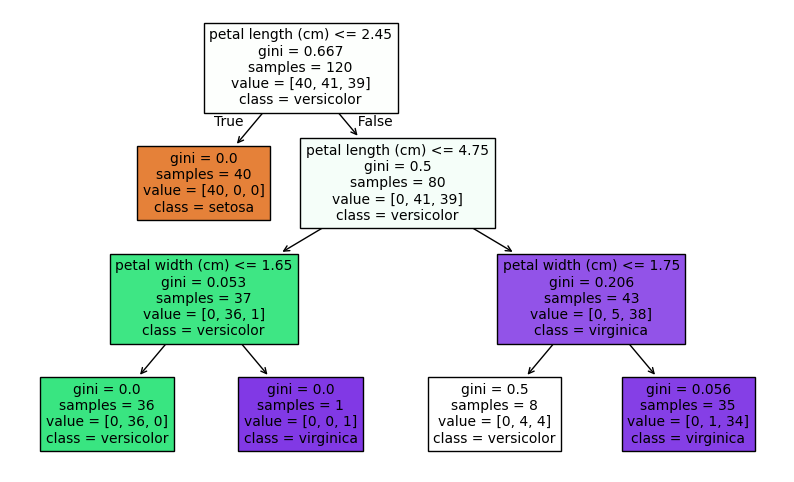

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


# Decision Tree Regressor

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Gerando dados simulados
np.random.seed(42)
X = np.linspace(0, 100, 200).reshape(-1, 1)
y = 3 * np.sin(X / 10) + np.random.randn(200) * 0.5 + X / 3  # Relação não-linear

# 2. Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
y_pred_linear = modelo_linear.predict(X_test)

def avaliar_modelo(nome, y_true, y_pred):
    print(f"\nModelo: {nome}")
    print(f"R²: {r2_score(y_true, y_pred):.2f}")

avaliar_modelo("Regressão Linear", y_test, y_pred_linear)

# 4. Regressão por Árvore de Decisão
modelo_arvore = DecisionTreeRegressor(max_depth=4, random_state=42)
modelo_arvore.fit(X_train, y_train)
y_pred_arvore = modelo_arvore.predict(X_test)
avaliar_modelo("Regressão Árvore de Decisão", y_test, y_pred_arvore)


Modelo: Regressão Linear
R²: 0.95

Modelo: Regressão Árvore de Decisão
R²: 0.99
